In [18]:
import numpy as np
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


all_data = pd.read_csv(r"D:\金属腐蚀\程序\选择模型\新数据集 23.08.04\Merged_file.csv")
all_data = all_data.sample(frac=1)

all_features = all_data.iloc[:,0:-2].values
all_labels = all_data.iloc[:,-1:]   #固定为一列

def maxminnorm(array):
    maxcols=array.max(axis=0)
    mincols=array.min(axis=0)
    data_shape = array.shape
    data_rows = data_shape[0]
    data_cols = data_shape[1]
    t=np.empty((data_rows,data_cols))
    for i in range(data_cols):
        t[:,i]=(array[:,i]-mincols[i])/(maxcols[i]-mincols[i])
    return t

all_features = maxminnorm(all_features)

all_features = np.nan_to_num(all_features)
all_labels = all_labels.values


def train_rfc(features,labels):
    train_data, test_data, train_labels, test_labels = features[:2500],features[2500:],labels[:2500],labels[2500:]
    rfc_clf = RandomForestClassifier(n_estimators=50,random_state=1,max_depth=15)
    start_time = time.time()
    rfc_clf.fit(train_data, train_labels)
    end_time = time.time()
    test_score = accuracy_score(test_labels, rfc_clf.predict(test_data))
    time_cost = end_time-start_time
    features_num = len(features[0])
    return test_score,time_cost,features_num

test_score = []
fea_num = []
modeltime_cost = []

def add_data(features,labels):
    score,cost_time,feanum = train_rfc(features,labels)
    test_score.append(score)
    fea_num.append(feanum)
    modeltime_cost.append(cost_time)


d:\work apps\ENVS\ANACONDA\envs\d2l\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (550) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:24: RuntimeWarning: invalid value encountered in true_divide
  t[:,i]=(array[:,i]-mincols[i])/(maxcols[i]-mincols[i])


In [19]:
test_score = []
fea_num = []
modeltime_cost = []
fea_time = []

In [20]:
#方差选择（Variance Threshold）
from sklearn.feature_selection import VarianceThreshold
# 创建方差选择对象
selector = VarianceThreshold(threshold=0.05)

# 应用方差选择
start_time=time.time()
VT_selected = selector.fit_transform(all_features)
end_time=time.time()
feature_time = end_time-start_time

fea_time.append(feature_time)
add_data(VT_selected,all_labels)
score,cost_time,feanum = train_rfc(VT_selected,all_labels)
print(score,cost_time,feanum)
print(test_score,fea_num,cost_time)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(train_data, train_labels)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(train_data, train_labels)


0.9306466729147141 0.5719120502471924 102
[0.9306466729147141] [102] 0.5719120502471924


In [21]:
#单变量特征选择（Univariate Feature Selection）示例代码（以卡方检验为例）
from sklearn.feature_selection import SelectKBest, chi2
# 创建单变量特征选择对象
selector = SelectKBest(chi2, k=260)

# 应用单变量特征选择
start_time=time.time()
UFS_selected = selector.fit_transform(all_features, all_labels)
end_time=time.time()
feature_time = end_time-start_time

fea_time.append(feature_time)
add_data(UFS_selected,all_labels)
score,cost_time,feanum = train_rfc(UFS_selected,all_labels)
print(score,cost_time,feanum)
print(test_score,fea_num,cost_time)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(train_data, train_labels)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(train_data, train_labels)


0.9372071227741331 0.7713677883148193 260
[0.9306466729147141, 0.9372071227741331] [102, 260] 0.7713677883148193


In [22]:
#递归特征消除（Recursive Feature Elimination）示例代码（以逻辑回归为例）
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 创建逻辑回归模型
model = LogisticRegression()

# 创建递归特征消除对象
selector = RFE(model, n_features_to_select=46)

# 应用递归特征消除
start_time=time.time()
RFE_selected = selector.fit_transform(all_features, all_labels)
end_time=time.time()
feature_time = end_time-start_time

fea_time.append(feature_time)
add_data(RFE_selected,all_labels)
score,cost_time,feanum = train_rfc(UFS_selected,all_labels)
print(score,cost_time,feanum)

d:\work apps\ENVS\ANACONDA\envs\d2l\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\work apps\ENVS\ANACONDA\envs\d2l\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\work apps\ENVS\ANACONDA\envs\d2l\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

0.9372071227741331 0.758195161819458 260


In [23]:
#L1正则化（L1 Regularization）示例代码（以线性回归为例）
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
# 创建L1正则化模型
model = Lasso(alpha=0.00001)

# 创建基于模型的特征选择对象
start_time=time.time()
selector = SelectFromModel(model)
# 应用基于模型的特征选择
L1_selected = selector.fit_transform(all_features, all_labels)
end_time=time.time()
feature_time = end_time-start_time

fea_time.append(feature_time)
add_data(L1_selected,all_labels)

d:\work apps\ENVS\ANACONDA\envs\d2l\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.038e+02, tolerance: 7.061e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(train_data, train_labels)


In [24]:
#随机森林嵌入式法
from sklearn.ensemble import RandomForestClassifier
#特征选择
np.random.seed(1)
# 创建随机森林分类器
rfc1 = RandomForestClassifier(n_estimators=100, random_state=1)
# 训练随机森林分类器
start_time=time.time()
rfc1.fit(all_features, all_labels)
# 输出特征重要性评估结果
importance1 = rfc1.feature_importances_
# 根据特征重要性评估结果筛选特征
selected_features1 = []
for i,v in enumerate(importance1):
    if v > 0.0014:
        selected_features1.append(i)
#将选择出的特征，建立新的数据集select_features
rfc_features = all_features[:, selected_features1]
end_time=time.time()
feature_time = end_time-start_time

fea_time.append(feature_time)
add_data(rfc_features,all_labels)
score,cost_time,feanum = train_rfc(rfc_features,all_labels)
print(score,cost_time,feanum)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1541342593.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc1.fit(all_features, all_labels)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(train_data, train_labels)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(train_data, train_labels)


0.9643861293345829 0.7833912372589111 206


In [25]:
#基于模型的特征选择（Model-based Feature Selection）示例代码（以逻辑回归为例）
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
# 创建逻辑回归模型
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# 创建基于模型的特征选择对象
selector = SelectFromModel(model)

# 应用基于模型的特征选择
start_time=time.time()
MFS_selected = selector.fit_transform(all_features, all_labels)
end_time=time.time()
feature_time = end_time-start_time

fea_time.append(feature_time)
add_data(MFS_selected,all_labels)
score,cost_time,feanum = train_rfc(MFS_selected,all_labels)
print(score,cost_time,feanum)

d:\work apps\ENVS\ANACONDA\envs\d2l\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(train_data, train_labels)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(train_data, train_labels)


0.9381443298969072 0.3177828788757324 133


In [26]:
#基于互信息的特征选择（Mutual Information-based Feature Selection）示例代码（以SelectKBest为例）
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# 创建基于互信息的特征选择对象
selector = SelectKBest(score_func=mutual_info_classif, k=50)

# 应用基于互信息的特征选择
start_time=time.time()
MIFS_selected = selector.fit_transform(all_features, all_labels)
end_time=time.time()
feature_time = end_time-start_time

fea_time.append(feature_time)
add_data(MIFS_selected,all_labels)

d:\work apps\ENVS\ANACONDA\envs\d2l\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(train_data, train_labels)


In [27]:
print("fea_num: ",fea_num)
print("fea_time: ",fea_time)

fea_num:  [102, 260, 46, 386, 206, 133, 50]
fea_time:  [0.02878880500793457, 0.02550983428955078, 143.80916571617126, 1.1485371589660645, 2.4416279792785645, 1.1638662815093994, 8.713963747024536]


In [28]:
add_data(all_features,all_labels)
fea_time.append(0)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\1417248851.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(train_data, train_labels)


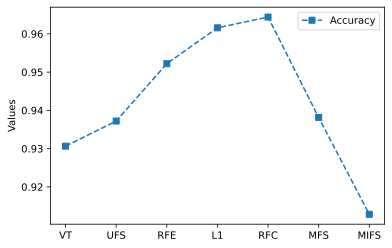

In [29]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

# 数据
group = [[]*8 for i in range(4)]
group[0] = test_score[:7]
group[1] = fea_num
group[2] = modeltime_cost
group[3] = fea_time



# 每个组的颜色
colors = ['#1f77b4', '#ff7f0e', '#2ca02c','red']
x_values = [1, 2, 3, 4, 5,6,7]
# 组名
g_names = ['VT', 'UFS','RFE','L1','RFC','MFS','MIFS']
group_names = ['test_score','feature_number','modeltime_cost','feature_select_time']
#group_names = 'test_score'

plt.plot(x_values, group[0], label='Accuracy', marker='s', linestyle='--')

# 添加图例
plt.legend()

# 设置X轴坐标点的名称
plt.xticks(x_values, g_names)

# 添加标题和标签
#plt.title('The results of each algorithm model')
#plt.xlabel('X-axis Label')
plt.ylabel('Values')
#plt.figure(dpi=100)
# 显示图形
plt.show()
